In [155]:
#import library
import tensorflow as tf
import neural_structured_learning as nsl
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [156]:
#loading data
cancer=load_breast_cancer()

In [157]:
cancer.DESCR.split('\n')

['.. _breast_cancer_dataset:',
 '',
 'Breast cancer wisconsin (diagnostic) dataset',
 '--------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 569',
 '',
 '    :Number of Attributes: 30 numeric, predictive attributes and the class',
 '',
 '    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features w

In [158]:
# shwing the data
data=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
data['target']=cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [159]:
# showing the shape
data.shape

(569, 31)

In [160]:
data['target'].unique()

array([0, 1])

## Preprocessing

In [161]:
# shwing the missing data to hundle it 
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## Feature Selection

<AxesSubplot:>

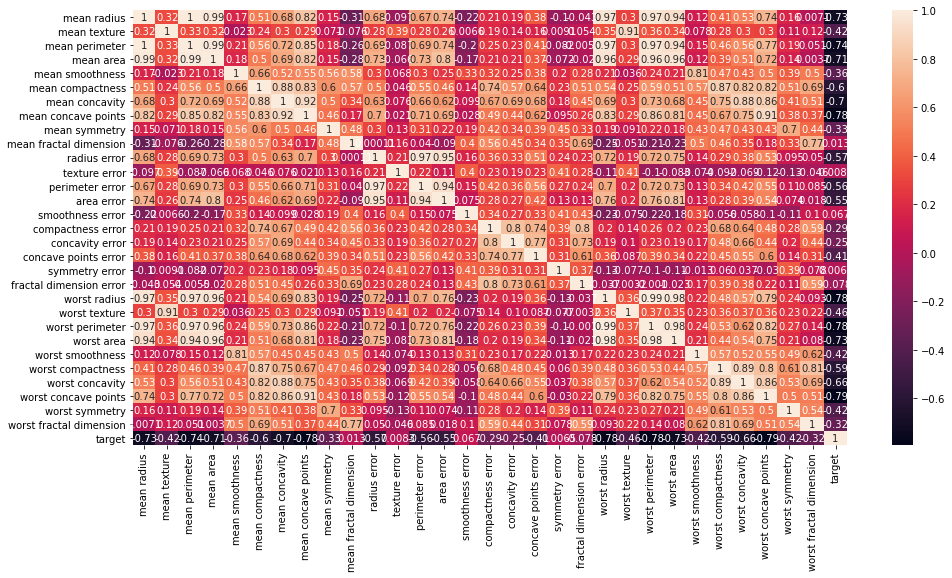

In [162]:
#finding the correlation among the variables
plt.figure(figsize=(16,8))
sns.heatmap(data=data.corr(),annot=True)

## ANN

In [163]:
from tensorflow import keras # high ebr 
from keras import Sequential # Sequential  is the type of model  
from keras.layers import Dense,Dropout 


In [164]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(data.iloc[:,:-1].values,data.iloc[:,-1].values,test_size=0.1)


In [165]:
# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.Input((30), name='feature'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    
    
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(25, activation=tf.nn.relu),
    
    
    tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)

])

In [168]:
# Compile, train, and evaluate.
adv_model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
adv_model.fit({'feature': x_train, 'label': y_train}, batch_size=30, epochs=30)
adv_model.evaluate({'feature': x_test, 'label': y_test})

Epoch 1/30


2000/2000 [==============================] - 5s 2ms/step - loss: 0.0035 - sparse_categorical_crossentropy: 0.0024 - sparse_categorical_accuracy: 0.9993 - scaled_adversarial_loss: 0.0011
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 8.6424e-04 - sparse_categorical_crossentropy: 5.2344e-04 - sparse_categorical_accuracy: 0.9998 - scaled_adversarial_loss: 3.4080e-04
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 4.1969e-04 - sparse_categorical_crossentropy: 2.2573e-04 - sparse_categorical_accuracy: 0.9999 - scaled_adversarial_loss: 1.9396e-04
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 2.8949e-04 - sparse_categorical_crossentropy: 1.4642e-04 - sparse_categorical_accuracy: 1.0000 - scaled_adversarial_loss: 1.4308e-04
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2170e-04 - sparse_categorical_crossentropy: 1.0843e-04 - sparse_categorical_accuracy: 1.0000 - scaled_adversa

313/313 [==============================] - 1s 2ms/step - loss: 0.2199 - sparse_categorical_crossentropy: 0.1744 - sparse_categorical_accuracy: 0.9833 - scaled_adversarial_loss: 0.0455 


[0.21989428997039795,
 0.17440876364707947,
 0.983299970626831,
 0.04548550397157669]